In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
df.shape

(3554, 18)

In [5]:
train_df=df.drop(columns=["society","price_per_sqft"])

In [7]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
458,house,sector 66,12.00,5.0,6.0,3+,4.0,New Property,3150.0,0.0,1.0,0.0,1.0,0.0,0.0,38.0
80,flat,sector 88a,1.00,2.0,2.0,3,7.0,Relatively New,1611.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0
2744,flat,sector 85,2.00,3.0,4.0,3,5.0,Relatively New,2026.0,0.0,1.0,0.0,0.0,0.0,0.0,156.0
1761,flat,sector 84,1.49,3.0,3.0,3,6.0,Relatively New,1833.0,0.0,1.0,0.0,0.0,0.0,0.0,28.0
373,house,sector 14,6.50,5.0,5.0,0,4.0,Moderately Old,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Luxury Score

In [8]:
df["luxury_score"].describe()

count    3554.000000
mean       72.461171
std        53.090901
min         0.000000
25%        34.000000
50%        60.000000
75%       111.000000
max       174.000000
Name: luxury_score, dtype: float64

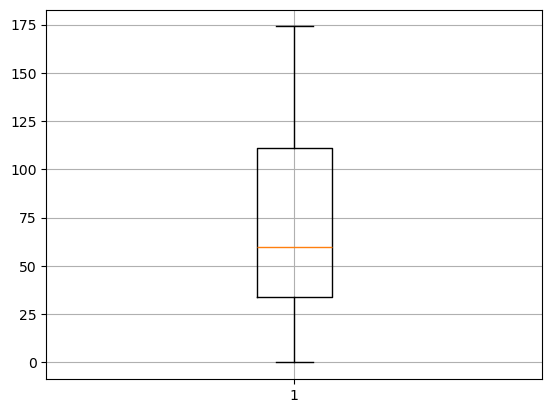

In [9]:
plt.boxplot(df["luxury_score"])
plt.grid()
plt.show()

In [6]:
def luxury_score_category(text):
    if 0<=text<50:
        return "low"
    elif 50<=text<150:
        return "medium"
    elif 150<=text<175:
        return "high"
    else :
        return None

In [7]:
train_df["luxury_score"]=train_df["luxury_score"].apply(luxury_score_category)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,high
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,high


In [13]:
train_df["luxury_score"].value_counts()

luxury_score
low       1594
medium    1465
high       495
Name: count, dtype: int64

### Floor Num

In [14]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

<Axes: ylabel='floorNum'>

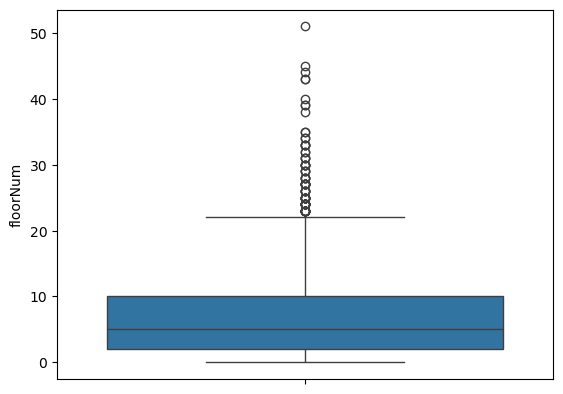

In [8]:
sns.boxplot(train_df["floorNum"])

In [9]:
def floor_num_category(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None 

In [10]:
train_df["floorNum"]=train_df["floorNum"].apply(floor_num_category)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,Low Floor,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,low
1,flat,sector 89,0.95,2.0,2.0,2,Mid Floor,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,low
2,flat,sohna road,0.32,2.0,2.0,1,High Floor,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,low
3,flat,sector 92,1.60,3.0,4.0,3+,Mid Floor,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,high
4,flat,sector 102,0.48,2.0,2.0,1,Mid Floor,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,high


In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoded_data=train_df.copy()

categorical_col=train_df.select_dtypes(include=["object"]).columns


oe=OrdinalEncoder()
encoded_data[categorical_col]=oe.fit_transform(encoded_data[categorical_col])

X_label=encoded_data.drop("price",axis=1)
Y_label=encoded_data["price"]


In [22]:
X_label.sample(20)

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2150,0.0,86.0,2.0,2.0,2.0,2.0,3.0,667.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1597,0.0,103.0,2.0,2.0,1.0,2.0,3.0,577.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1386,0.0,82.0,2.0,2.0,1.0,2.0,0.0,1115.00,0.0,0.0,1.0,0.0,0.0,0.0,2.0
588,1.0,22.0,4.0,4.0,4.0,1.0,2.0,3500.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0
84,0.0,89.0,3.0,3.0,2.0,2.0,3.0,1350.00,1.0,1.0,1.0,1.0,0.0,1.0,0.0
583,0.0,38.0,2.0,2.0,3.0,2.0,3.0,1310.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0
306,0.0,99.0,3.0,2.0,2.0,2.0,3.0,1325.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1705,1.0,46.0,4.0,3.0,3.0,2.0,3.0,90.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2161,1.0,95.0,3.0,3.0,2.0,1.0,4.0,1423.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0
205,0.0,67.0,4.0,4.0,3.0,2.0,3.0,1975.00,1.0,1.0,0.0,0.0,0.0,1.0,2.0


In [12]:
train_df.select_dtypes(include=["object"]).columns

Index(['property_type', 'sector', 'balcony', 'floorNum', 'agePossession',
       'luxury_score'],
      dtype='object')

In [13]:
Y_label.head()

0    0.82
1    0.95
2    0.32
3    1.60
4    0.48
Name: price, dtype: float64

### Correlation Analysis

<Axes: >

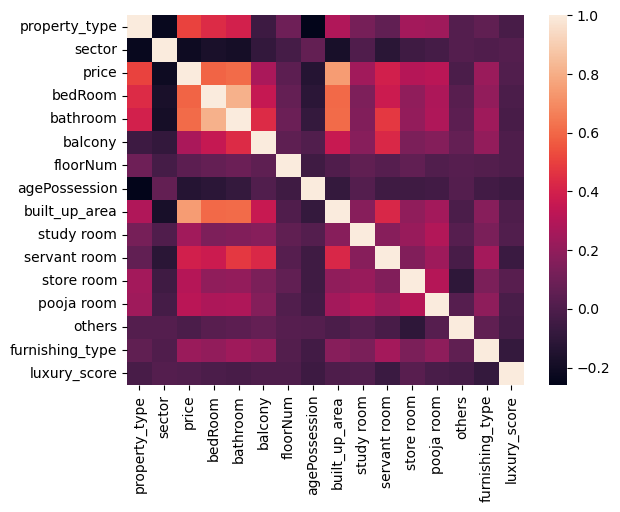

In [25]:
sns.heatmap(encoded_data.corr())

In [26]:
f1=encoded_data.corr()["price"].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
f1=f1.drop(2).reset_index().drop(columns="index")
f1

,feature,corr_coeff
0,property_type,0.503728
1,sector,-0.212084
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,floorNum,0.042745
6,agePossession,-0.134171
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930


### RandomForest Feature Importance

In [27]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,random_state=42)

model.fit(X_label,Y_label)

RandomForestRegressor(random_state=42)

In [94]:
model.feature_importances_

array([0.10008714, 0.10201672, 0.02343744, 0.02651381, 0.01299886,
       0.00661195, 0.01447922, 0.65055323, 0.00855933, 0.01912327,
       0.00810161, 0.0063992 , 0.00285382, 0.0105449 , 0.0077195 ])

In [28]:
f2=pd.DataFrame(
    {"feature":X_label.columns,
     "rf_importance":model.feature_importances_
}).sort_values(by='rf_importance',ascending=False)
f2

,feature,rf_importance
7,built_up_area,0.650553
1,sector,0.102017
0,property_type,0.100087
3,bathroom,0.026514
2,bedRoom,0.023437
9,servant room,0.019123
6,agePossession,0.014479
4,balcony,0.012999
13,furnishing_type,0.010545
8,study room,0.008559


### Gradient Boosting Feature Importance

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbr=GradientBoostingRegressor()
gbr.fit(X_label, Y_label)

f3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gbr.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

f3

,feature,gb_importance
7,built_up_area,0.677840
1,sector,0.102987
0,property_type,0.098328
2,bedRoom,0.037891
3,bathroom,0.036181
9,servant room,0.023195
10,store room,0.010356
6,agePossession,0.004180
8,study room,0.003152
13,furnishing_type,0.002804


### Permutation Importance

In [34]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, Y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)


In [35]:
f4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

f4

,feature,permutation_importance
7,built_up_area,0.733165
0,property_type,0.201652
1,sector,0.179674
3,bathroom,0.020775
9,servant room,0.019491
2,bedRoom,0.019420
6,agePossession,0.004945
10,store room,0.001876
14,luxury_score,0.001867
11,pooja room,0.001133


### Lasso
Lasso not reliable in cas eof sector as it was ordinal encoded , but for linear model we should use One Hot Encoding

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, Y_label)

# Extract coefficients
f5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

f5

,feature,lasso_coeff
7,built_up_area,1.510172
0,property_type,0.713827
3,bathroom,0.275041
10,store room,0.199655
8,study room,0.171846
13,furnishing_type,0.164113
9,servant room,0.160600
11,pooja room,0.073845
14,luxury_score,0.055268
2,bedRoom,0.014174


###  Recursive Feature Elimination

In [38]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, Y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
f6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

f6

,feature,rfe_score
7,built_up_area,0.650121
1,sector,0.103443
0,property_type,0.099203
3,bathroom,0.026171
2,bedRoom,0.024666
9,servant room,0.017150
6,agePossession,0.014826
4,balcony,0.012924
13,furnishing_type,0.010347
10,store room,0.008981


###  Linear Regression Weights

In [40]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, Y_label)

# Extract coefficients
f7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

f7

,feature,reg_coeffs
7,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
10,store room,0.204159
8,study room,0.180048
13,furnishing_type,0.173192
9,servant room,0.169605
11,pooja room,0.076893
14,luxury_score,0.066472
2,bedRoom,0.016790


### SHAP

In [131]:
!pip install shap

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [1]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
f8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

f8

In [51]:
final_df=f1.merge(f2,on='feature').merge(f3,on="feature").merge(f4,on="feature").merge(f5,on="feature").merge(f6,on="feature").merge(f7,on="feature").set_index("feature")

In [52]:
final_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
property_type,0.503728,0.100087,0.098328,0.201652,0.713827,0.099203,0.712890
sector,-0.212084,0.102017,0.102987,0.179674,-0.069634,0.103443,-0.078657
bedRoom,0.591289,0.023437,0.037891,0.019420,0.014174,0.024666,0.016790
bathroom,0.609777,0.026514,0.036181,0.020775,0.275041,0.026171,0.281976
balcony,0.269637,0.012999,0.001748,0.000513,-0.043562,0.012924,-0.066353
floorNum,0.042745,0.006612,0.000455,0.000999,-0.002610,0.006502,-0.013482
agePossession,-0.134171,0.014479,0.004180,0.004945,-0.000000,0.014826,-0.002041
built_up_area,0.748574,0.650553,0.677840,0.733165,1.510172,0.650121,1.512629
study room,0.242955,0.008559,0.003152,-0.017219,0.171846,0.008763,0.180048


In [53]:
# normalize the score
final_df = final_df.divide(final_df.sum(axis=0), axis=1)

In [54]:
final_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
property_type,0.129086,0.100087,0.098328,0.174150,0.222683,0.099203,0.222156
sector,-0.054349,0.102017,0.102987,0.155169,-0.021723,0.103443,-0.024512
bedRoom,0.151525,0.023437,0.037891,0.016771,0.004422,0.024666,0.005232
bathroom,0.156263,0.026514,0.036181,0.017942,0.085801,0.026171,0.087871
balcony,0.069098,0.012999,0.001748,0.000443,-0.013590,0.012924,-0.020677
floorNum,0.010954,0.006612,0.000455,0.000863,-0.000814,0.006502,-0.004201
agePossession,-0.034383,0.014479,0.004180,0.004271,-0.000000,0.014826,-0.000636
built_up_area,0.191831,0.650553,0.677840,0.633174,0.471108,0.650121,0.471376
study room,0.062260,0.008559,0.003152,-0.014870,0.053609,0.008763,0.056108


In [56]:
final_df[['rf_importance','gb_importance','permutation_importance','rfe_score',]].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.652922
property_type      0.117942
sector             0.115904
bathroom           0.026702
bedRoom            0.025691
servant room       0.019075
agePossession      0.009439
store room         0.007265
balcony            0.007029
luxury_score       0.004154
floorNum           0.003608
pooja room         0.003558
furnishing_type    0.003542
others             0.001768
study room         0.001401
dtype: float64

In [1]:
#so we can remove last 3 feature 
#but before removing columns we will compare performance of with all columns and without these columns , if no significance change then, we will remove 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [21]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

scores = cross_val_score(model, X_label, Y_label, cv=5, scoring='r2')

In [23]:
scores.mean()

0.8199450708564526

In [25]:
#without those 3 columns
model = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(model, X_label.drop(columns=['pooja room', 'study room', 'others']), Y_label, cv=5, scoring='r2')
scores.mean()

0.8194305255408242

In [27]:
export_df=X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df["price"]=Y_label

In [28]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,price
0,0.0,36.0,3.0,2.0,2.0,1.0,1.0,850.0,0.0,0.0,0.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,0.95
2,0.0,103.0,2.0,2.0,1.0,0.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.32
3,0.0,99.0,3.0,4.0,4.0,2.0,3.0,1615.0,1.0,0.0,1.0,0.0,1.60
4,0.0,5.0,2.0,2.0,1.0,2.0,3.0,582.0,0.0,1.0,0.0,0.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,2.0,3.0,532.0,0.0,0.0,0.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,1.0,3.0,6228.0,1.0,1.0,0.0,0.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,2.0,0.0,665.0,0.0,0.0,1.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,2.0,0.0,5490.0,1.0,1.0,0.0,2.0,15.50


In [29]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)